# **Data Inspection and Cleaning**

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score

## Load Dataset

In [2]:
df = pd.read_csv('/content/Asteroid_Dataset.csv')

<ipython-input-2-8a4f76190b80>:1: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/Asteroid_Dataset.csv')


## Data Overview

In [3]:
df.head(3)

,spkid,full_name,pha,H,diameter,albedo,diameter_sigma,e,a,q,...,sigma_i,sigma_om,sigma_w,sigma_ma,sigma_ad,sigma_n,sigma_tp,sigma_per,class,rms
0,2000001,' 1 Ceres',N,3.40,939.4,0.090,0.2,0.077557,2.767657,2.553006,...,4.613200e-09,6.176900e-08,6.618400e-08,7.355900e-09,1.115900e-11,1.201400e-12,3.686700e-08,9.439100e-09,MBA,0.40633
1,2000002,' 2 Pallas',N,4.20,545.0,0.101,18.0,0.229972,2.773841,2.135935,...,3.701900e-06,6.412400e-06,9.494400e-06,9.151500e-06,5.054200e-09,4.740800e-10,4.219400e-05,3.749600e-06,MBA,0.36151
2,2000003,' 3 Juno',N,5.33,246.596,0.214,10.594000000000001,0.256936,2.668285,1.982706,...,3.232100e-06,1.687400e-05,1.795300e-05,8.114300e-06,4.413000e-09,4.463100e-10,3.530500e-05,3.142200e-06,MBA,0.33306


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126131 entries, 0 to 126130
Data columns (total 35 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   spkid           126131 non-null  int64  
 1   full_name       126131 non-null  object 
 2   pha             126131 non-null  object 
 3   H               126131 non-null  float64
 4   diameter        126131 non-null  object 
 5   albedo          126131 non-null  float64
 6   diameter_sigma  126131 non-null  object 
 7   e               126131 non-null  float64
 8   a               126131 non-null  float64
 9   q               126131 non-null  float64
 10  i               126131 non-null  float64
 11  om              126131 non-null  float64
 12  w               126131 non-null  float64
 13  ma              126131 non-null  float64
 14  ad              126131 non-null  float64
 15  n               126131 non-null  float64
 16  tp              126131 non-null  float64
 17  tp_cal    

In [5]:
print(df.isnull().sum())

spkid             0
full_name         0
pha               0
H                 0
diameter          0
albedo            0
diameter_sigma    0
e                 0
a                 0
q                 0
i                 0
om                0
w                 0
ma                0
ad                0
n                 0
tp                0
tp_cal            0
per               0
per_y             0
moid              0
moid_ld           0
sigma_e           0
sigma_a           0
sigma_q           0
sigma_i           0
sigma_om          0
sigma_w           0
sigma_ma          0
sigma_ad          0
sigma_n           0
sigma_tp          0
sigma_per         0
class             0
rms               0
dtype: int64


In [6]:
print(df.isnull().sum().sum())

0


There are no missing values in the dataset

## Type Conversion

In [7]:
df['diameter'] = pd.to_numeric(df['diameter'], errors='coerce')

In [8]:
df['diameter_sigma'] = pd.to_numeric(df['diameter_sigma'], errors='coerce')

## Clean String Columns

In [9]:
df['full_name'] = df['full_name'].str.strip().str.replace("'", "", regex=False)

In [10]:
df['pha'] = df['pha'].str.strip()

## Verify Conversion

In [11]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126131 entries, 0 to 126130
Data columns (total 35 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   spkid           126131 non-null  int64  
 1   full_name       126131 non-null  object 
 2   pha             126131 non-null  object 
 3   H               126131 non-null  float64
 4   diameter        126128 non-null  float64
 5   albedo          126131 non-null  float64
 6   diameter_sigma  126035 non-null  float64
 7   e               126131 non-null  float64
 8   a               126131 non-null  float64
 9   q               126131 non-null  float64
 10  i               126131 non-null  float64
 11  om              126131 non-null  float64
 12  w               126131 non-null  float64
 13  ma              126131 non-null  float64
 14  ad              126131 non-null  float64
 15  n               126131 non-null  float64
 16  tp              126131 non-null  float64
 17  tp_cal    

In [12]:
print(df.isnull().sum())

spkid              0
full_name          0
pha                0
H                  0
diameter           3
albedo             0
diameter_sigma    96
e                  0
a                  0
q                  0
i                  0
om                 0
w                  0
ma                 0
ad                 0
n                  0
tp                 0
tp_cal             0
per                0
per_y              0
moid               0
moid_ld            0
sigma_e            0
sigma_a            0
sigma_q            0
sigma_i            0
sigma_om           0
sigma_w            0
sigma_ma           0
sigma_ad           0
sigma_n            0
sigma_tp           0
sigma_per          0
class              0
rms                0
dtype: int64


drop rows where the diameter missing values are found

In [13]:
df = df.dropna(subset=['diameter'])
print(df.isnull().sum())

spkid              0
full_name          0
pha                0
H                  0
diameter           0
albedo             0
diameter_sigma    93
e                  0
a                  0
q                  0
i                  0
om                 0
w                  0
ma                 0
ad                 0
n                  0
tp                 0
tp_cal             0
per                0
per_y              0
moid               0
moid_ld            0
sigma_e            0
sigma_a            0
sigma_q            0
sigma_i            0
sigma_om           0
sigma_w            0
sigma_ma           0
sigma_ad           0
sigma_n            0
sigma_tp           0
sigma_per          0
class              0
rms                0
dtype: int64


filling the missing values with median for diameter_sigma column

In [14]:
median_sigma = df['diameter_sigma'].median()
df['diameter_sigma'].fillna(median_sigma, inplace=True)

<ipython-input-14-01f641b4ec3f>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['diameter_sigma'].fillna(median_sigma, inplace=True)
<ipython-input-14-01f641b4ec3f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['diameter_sigma'].fillna(median_sigma, inplace=True)


In [15]:
print(df.isnull().sum())

spkid             0
full_name         0
pha               0
H                 0
diameter          0
albedo            0
diameter_sigma    0
e                 0
a                 0
q                 0
i                 0
om                0
w                 0
ma                0
ad                0
n                 0
tp                0
tp_cal            0
per               0
per_y             0
moid              0
moid_ld           0
sigma_e           0
sigma_a           0
sigma_q           0
sigma_i           0
sigma_om          0
sigma_w           0
sigma_ma          0
sigma_ad          0
sigma_n           0
sigma_tp          0
sigma_per         0
class             0
rms               0
dtype: int64


## Final overview

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 126128 entries, 0 to 126130
Data columns (total 35 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   spkid           126128 non-null  int64  
 1   full_name       126128 non-null  object 
 2   pha             126128 non-null  object 
 3   H               126128 non-null  float64
 4   diameter        126128 non-null  float64
 5   albedo          126128 non-null  float64
 6   diameter_sigma  126128 non-null  float64
 7   e               126128 non-null  float64
 8   a               126128 non-null  float64
 9   q               126128 non-null  float64
 10  i               126128 non-null  float64
 11  om              126128 non-null  float64
 12  w               126128 non-null  float64
 13  ma              126128 non-null  float64
 14  ad              126128 non-null  float64
 15  n               126128 non-null  float64
 16  tp              126128 non-null  float64
 17  tp_cal         

# **EDA**

In [17]:
print(df['diameter'].describe())

count    126128.000000
mean          5.734153
std           9.747910
min           0.083000
25%           2.925000
50%           4.147000
75%           5.965000
max         939.400000
Name: diameter, dtype: float64


In order to stabilize variance and enhance model performance, we may need to manage outliers or implement a transformation (such as logarithmic) due to the extreme high values in the diameter distribution.

In [18]:
df['log_diameter'] = np.log1p(df['diameter'])

<ipython-input-18-d0802280b72c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['log_diameter'] = np.log1p(df['diameter'])


In [19]:
print(df['log_diameter'].describe())

count    126128.000000
mean          1.703528
std           0.522764
min           0.079735
25%           1.367366
50%           1.638414
75%           1.940898
max           6.846305
Name: log_diameter, dtype: float64


In [20]:
print(df['H'].describe())

count    126128.000000
mean         15.048312
std           1.333188
min           3.000000
25%          14.400000
50%          15.200000
75%          15.900000
max          22.900000
Name: H, dtype: float64


In [21]:
print(df['albedo'].describe())

count    126128.000000
mean          0.134925
std           0.112425
min           0.001000
25%           0.054000
50%           0.081000
75%           0.200000
max           1.000000
Name: albedo, dtype: float64


##  Visualizing Distributions

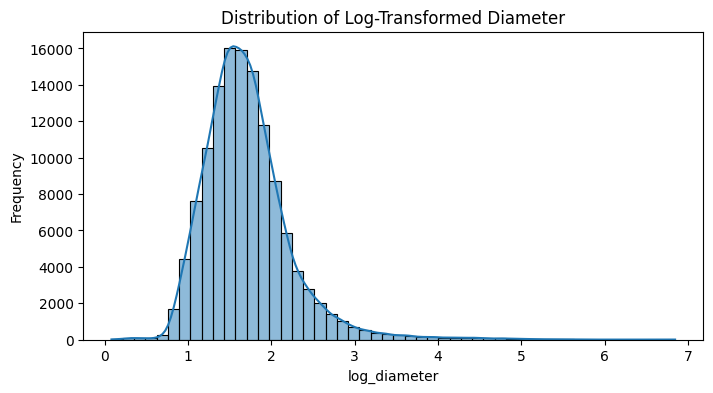

In [22]:
plt.figure(figsize=(8, 4))
sns.histplot(df['log_diameter'], kde=True, bins=50)
plt.title("Distribution of Log-Transformed Diameter")
plt.xlabel("log_diameter")
plt.ylabel("Frequency")
plt.show()

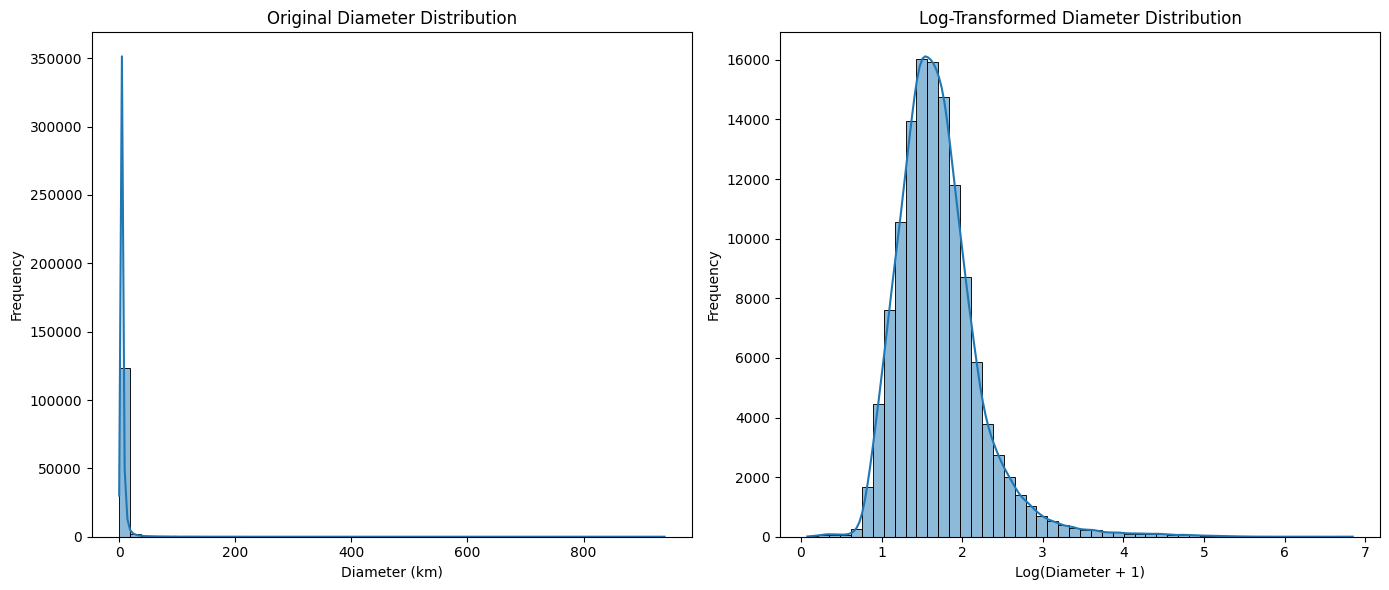

In [23]:
# Plot histograms for original and log-transformed diameter side-by-side
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.histplot(df['diameter'], kde=True, bins=50)
plt.title("Original Diameter Distribution")
plt.xlabel("Diameter (km)")
plt.ylabel("Frequency")

plt.subplot(1, 2, 2)
sns.histplot(df['log_diameter'], kde=True, bins=50)
plt.title("Log-Transformed Diameter Distribution")
plt.xlabel("Log(Diameter + 1)")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

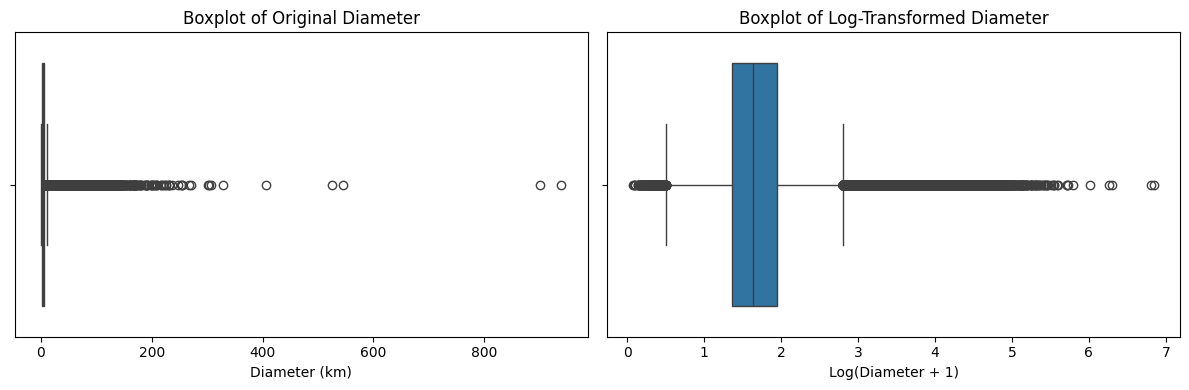

In [24]:
# Boxplots for additional visual inspection
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
sns.boxplot(x=df['diameter'])
plt.title("Boxplot of Original Diameter")
plt.xlabel("Diameter (km)")

plt.subplot(1, 2, 2)
sns.boxplot(x=df['log_diameter'])
plt.title("Boxplot of Log-Transformed Diameter")
plt.xlabel("Log(Diameter + 1)")

plt.tight_layout()
plt.show()

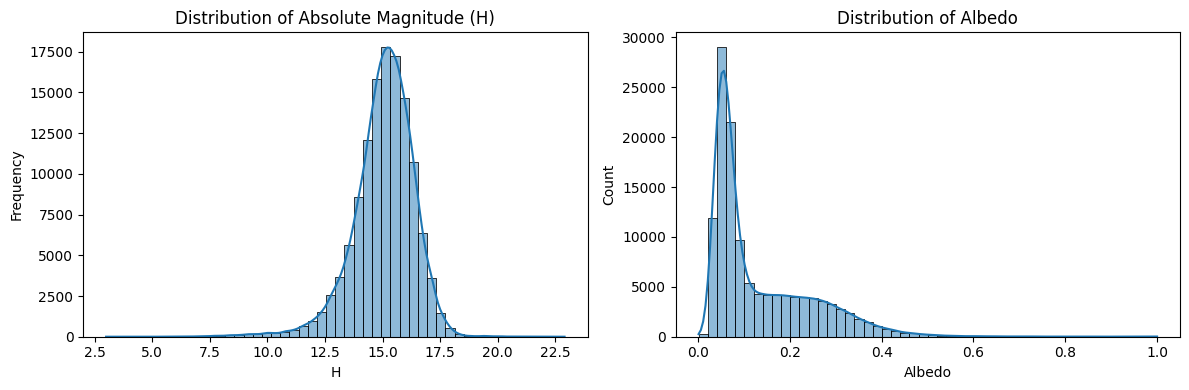

In [25]:
# Distribution for H and albedo
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
sns.histplot(df['H'], kde=True, bins=50)
plt.title("Distribution of Absolute Magnitude (H)")
plt.xlabel("H")
plt.ylabel("Frequency")

plt.subplot(1, 2, 2)
sns.histplot(df['albedo'], kde=True, bins=50)
plt.title("Distribution of Albedo")
plt.xlabel("Albedo")

plt.tight_layout()
plt.show()

## Correlation Analysis


Correlation Matrix (Including Log-Transformed Diameter)
              log_diameter         H    albedo         e         a         q  \
log_diameter      1.000000 -0.828198 -0.311252 -0.135230  0.286633  0.498460   
H                -0.828198  1.000000 -0.208956  0.165470 -0.190659 -0.355315   
albedo           -0.311252 -0.208956  1.000000 -0.011492 -0.180530 -0.288628   
e                -0.135230  0.165470 -0.011492  1.000000 -0.041045 -0.523373   
a                 0.286633 -0.190659 -0.180530 -0.041045  1.000000  0.536219   
q                 0.498460 -0.355315 -0.288628 -0.523373  0.536219  1.000000   
i                 0.162458 -0.110148 -0.062070  0.134871  0.153662  0.112350   

                     i  
log_diameter  0.162458  
H            -0.110148  
albedo       -0.062070  
e             0.134871  
a             0.153662  
q             0.112350  
i             1.000000  


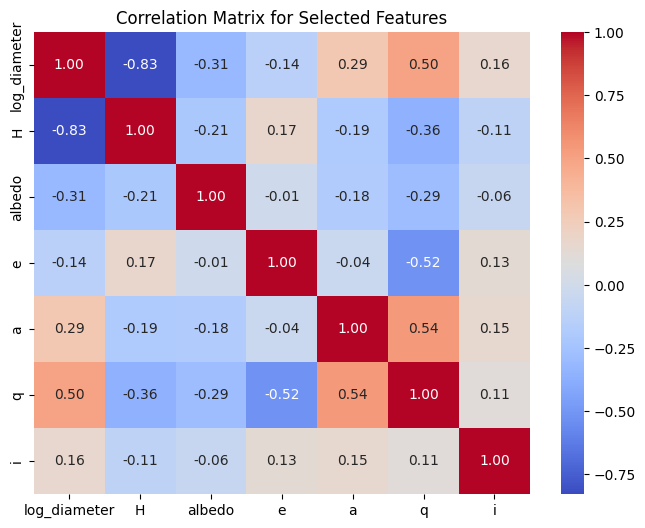

In [26]:
# Selecting a subset of key features for correlation analysis
features = ['log_diameter', 'H', 'albedo', 'e', 'a', 'q', 'i']
corr_matrix = df[features].corr()
print("\nCorrelation Matrix (Including Log-Transformed Diameter)")
print(corr_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Matrix for Selected Features")
plt.show()

## Scatter Plots to Explore Relationships

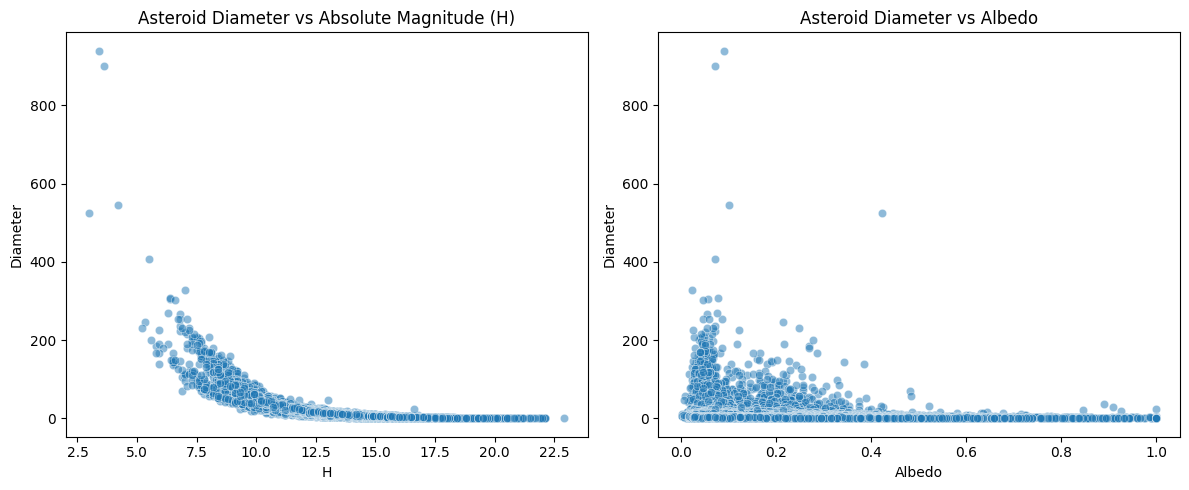

In [27]:
# Scatter plot to original diameter
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.scatterplot(x='H', y='diameter', data=df, alpha=0.5)
plt.title("Asteroid Diameter vs Absolute Magnitude (H)")
plt.xlabel("H")
plt.ylabel("Diameter")

plt.subplot(1, 2, 2)
sns.scatterplot(x='albedo', y='diameter', data=df, alpha=0.5)
plt.title("Asteroid Diameter vs Albedo")
plt.xlabel("Albedo")
plt.ylabel("Diameter")

plt.tight_layout()
plt.show()

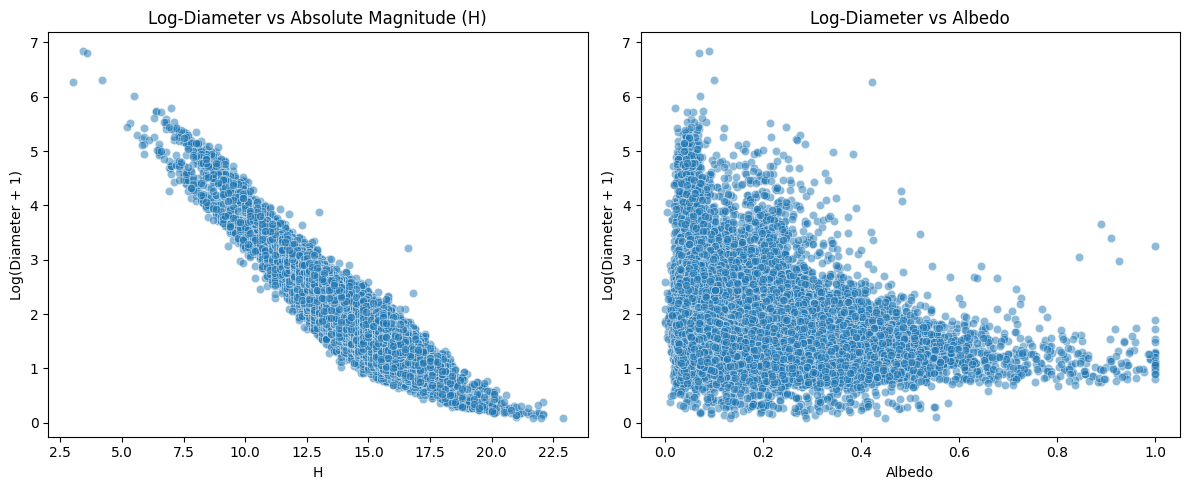

In [28]:
# Scatter plot to Log-transformed diameter
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.scatterplot(x='H', y='log_diameter', data=df, alpha=0.5)
plt.title("Log-Diameter vs Absolute Magnitude (H)")
plt.xlabel("H")
plt.ylabel("Log(Diameter + 1)")

plt.subplot(1, 2, 2)
sns.scatterplot(x='albedo', y='log_diameter', data=df, alpha=0.5)
plt.title("Log-Diameter vs Albedo")
plt.xlabel("Albedo")
plt.ylabel("Log(Diameter + 1)")

plt.tight_layout()
plt.show()

# **Feature Engineering & Selection**

Creating a new feature computed_diameter using the standard formula:\
d = 1329 / sqrt(albedo) * 10^(-0.2 * H)

In [29]:
df['computed_diameter'] = 1329 / np.sqrt(df['albedo']) * (10 ** (-0.2 * df['H']))

a log-transformed version of computed_diameter to compare with log_diameter

In [30]:
df['log_computed_diameter'] = np.log1p(df['computed_diameter'])

## Feature Selection Preparation

In [31]:
cols_to_drop = ['spkid', 'full_name', 'pha', 'diameter']
df_model = df.drop(columns=cols_to_drop)

potential predictor features:

In [32]:
potential_features = [
    'H', 'albedo', 'computed_diameter', 'log_computed_diameter',
    'e', 'a', 'q', 'i', 'om', 'w', 'ma', 'ad', 'n', 'tp', 'tp_cal',
    'per', 'per_y', 'moid', 'moid_ld',
    'sigma_e', 'sigma_a', 'sigma_q', 'sigma_i', 'sigma_om', 'sigma_w',
    'sigma_ma', 'sigma_ad', 'sigma_n', 'sigma_tp', 'sigma_per', 'rms'
]

## Assessing Feature Correlations

In [33]:
# correlation of each candidate feature with the target: log_diameter
corr_with_target = df_model[potential_features + ['log_diameter']].corr()['log_diameter'].abs().sort_values(ascending=False)
print("Correlation of potential features with log_diameter:")
print(corr_with_target)

Correlation of potential features with log_diameter:
log_diameter             1.000000
log_computed_diameter    0.983916
H                        0.828198
computed_diameter        0.669689
moid                     0.501982
moid_ld                  0.501982
q                        0.498460
n                        0.488436
rms                      0.355508
albedo                   0.311252
a                        0.286633
ad                       0.175343
i                        0.162458
sigma_i                  0.143191
e                        0.135230
per_y                    0.070687
per                      0.070687
sigma_om                 0.060137
sigma_tp                 0.038970
sigma_q                  0.037441
sigma_ma                 0.034419
sigma_e                  0.024101
sigma_a                  0.018821
tp                       0.018224
tp_cal                   0.017683
sigma_ad                 0.017317
sigma_w                  0.016253
sigma_n                  0.01

## Finalize Feature Selection and Prepare Data for Modeling

In [34]:
selected_features = ['H', 'albedo', 'moid', 'q', 'n']

In [35]:
# Prepare the predictor (X) and target (y) variables
X = df_model[selected_features]
y = df_model['log_diameter']

Checking the correlation matrix for the selected features with the target

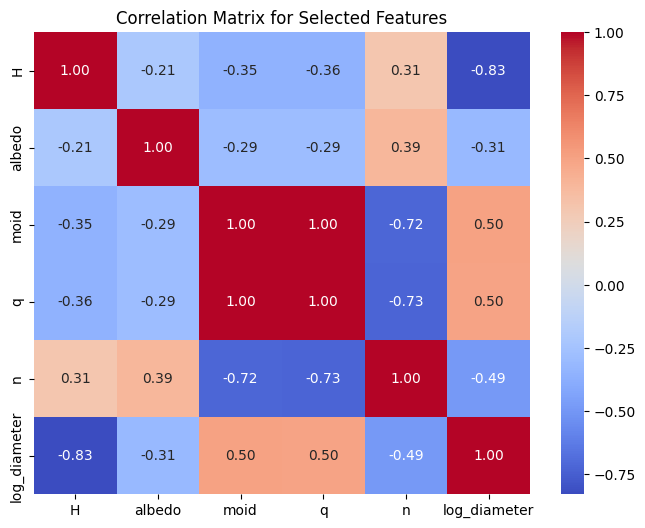

In [36]:
selected_corr = df_model[selected_features + ['log_diameter']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(selected_corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Matrix for Selected Features")
plt.show()

# **Data Splitting**

In [37]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.20, random_state=42)

In [38]:
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.50, random_state=42)

In [39]:
print("Training set shape:", X_train.shape, y_train.shape)
print("Validation set shape:", X_val.shape, y_val.shape)
print("Test set shape:", X_test.shape, y_test.shape)

Training set shape: (100902, 5) (100902,)
Validation set shape: (12613, 5) (12613,)
Test set shape: (12613, 5) (12613,)


# **Model Building**

In [40]:
lr_model = LinearRegression()
rf_model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)

In [41]:
models = {
    "Linear Regression": lr_model,
    "Random Forest": rf_model,
    "Gradient Boosting": gb_model
}

In [42]:
# Train each model on the training set and evaluate on the validation set
for model_name, model in models.items():
    print(f"\nTraining {model_name}...")
    # Fit the model
    model.fit(X_train, y_train)

    # Predict on the validation set
    y_val_pred = model.predict(X_val)

    # Calculate evaluation metrics: RMSE and R² score
    rmse = np.sqrt(mean_squared_error(y_val, y_val_pred))
    r2 = r2_score(y_val, y_val_pred)

    print(f"{model_name} - Validation RMSE: {rmse:.4f}, R²: {r2:.4f}")


Training Linear Regression...
Linear Regression - Validation RMSE: 0.1379, R²: 0.9292

Training Random Forest...
Random Forest - Validation RMSE: 0.0826, R²: 0.9746

Training Gradient Boosting...
Gradient Boosting - Validation RMSE: 0.0845, R²: 0.9734


# **Hyperparameter Tuning**

Hyperparameter Tuning for Random Forest

In [43]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_model = RandomForestRegressor(random_state=42, n_jobs=-1)

In [47]:
random_search = RandomizedSearchCV(estimator=rf_model,
                                   param_distributions=param_grid,
                                   n_iter=20,
                                   cv=3,
                                   scoring='neg_mean_squared_error',
                                   n_jobs=-1,
                                   verbose=2,
                                   random_state=42)

In [48]:
# Fit random search on the training data
random_search.fit(X_train, y_train)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


RandomizedSearchCV(cv=3,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'max_depth': [None, 10, 20, 30],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [51]:
best_params = random_search.best_params_
best_cv_rmse = np.sqrt(-random_search.best_score_)
print("Best Parameters from RandomizedSearchCV:", best_params)
print("Best CV RMSE from RandomizedSearchCV:", best_cv_rmse)

Best Parameters from RandomizedSearchCV: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_depth': 10}
Best CV RMSE from RandomizedSearchCV: 0.0813213281663515


# **Evaluation**

In [56]:
# Get the best estimator from RandomizedSearchCV
best_rf_model = random_search.best_estimator_

# Predict on the test set
y_test_pred = best_rf_model.predict(X_test)

In [64]:
# Calculate test RMSE and R² score
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
test_r2 = r2_score(y_test, y_test_pred)

In [66]:
print(f"Test RMSE: {test_rmse:.4f}")
print(f"Test R2: {test_r2:.4f}")

Test RMSE: 0.0789
Test R2: 0.9776


# **Feature Importance Analysis**

In [53]:
# Retrieve feature importances from the best model
importances = best_rf_model.feature_importances_
feature_names = X.columns

In [63]:
feat_importances = pd.Series(importances, index=feature_names).sort_values(ascending=False)
print("\nFeature Importances:")
print(feat_importances)


Feature Importances:
H         0.726688
albedo    0.180014
n         0.089942
moid      0.001800
q         0.001555
dtype: float64


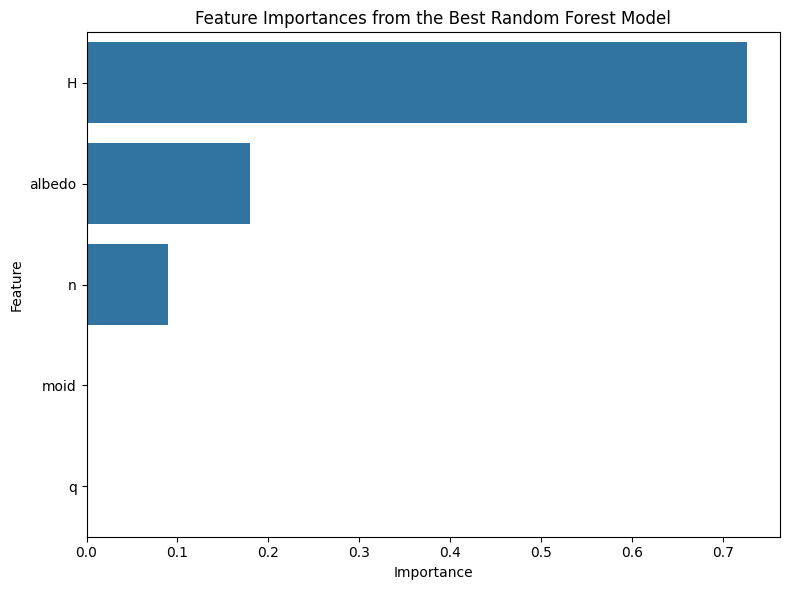

In [55]:
# Plot the feature importances
plt.figure(figsize=(8, 6))
sns.barplot(x=feat_importances.values, y=feat_importances.index)
plt.title("Feature Importances from the Best Random Forest Model")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()